# Hackathan


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
print(pd.__version__)
print(np.__version__)
# print(plt.__version__)
print(sns.__version__)


1.5.3
1.23.5
0.12.2


### Load the dataframe from csv file

In [12]:
data = pd.read_csv(r"C:\Users\Welcome\Downloads\world-happiness-report-2021.csv")
data

Country name  Regional indicator  Ladder score  \
0        Finland      Western Europe         7.842   
1        Denmark      Western Europe         7.620   
2    Switzerland      Western Europe         7.571   
3        Iceland      Western Europe         7.554   
4    Netherlands      Western Europe         7.464   
..           ...                 ...           ...   
144      Lesotho  Sub-Saharan Africa         3.512   
145     Botswana  Sub-Saharan Africa         3.467   
146       Rwanda  Sub-Saharan Africa         3.415   
147     Zimbabwe  Sub-Saharan Africa         3.145   
148  Afghanistan          South Asia         2.523   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
0                             0.032         7.904         7.780   
1                             0.035         7.687         7.552   
2                             0.036         7.643         7.500   
3                             0.059         7.670         7.438   
4                             0.027         7.518         7.410   
..                              ...           ...           ...   
144                           0.120         3.748         3.276   
145                           0.074         3.611         3.322   
146                           0.068         3.548         3.282   
147                           0.058         3.259         3.030   
148                           0.038         2.596         2.449   

     Logged GDP per capita  Social support  Healthy life expectancy  \
0                   10.775           0.954                   72.000   
1                   10.933           0.954                   72.700   
2                   11.117           0.942                   74.400   
3                   10.878           0.983                   73.000   
4                   10.932           0.942                   72.400   
..                     ...             ...                      ...   
144                  7.926           0.787                   48.700   
145                  9.782           0.784                   59.269   
146                  7.676           0.552                   61.400   
147                  7.943           0.750                   56.201   
148                  7.695           0.463                   52.493   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           0.949      -0.098                      0.186   
1                           0.946       0.030                      0.179   
2                           0.919       0.025                      0.292   
3                           0.955       0.160                      0.673   
4                           0.913       0.175                      0.338   
..                            ...         ...                        ...   
144                         0.715      -0.131                      0.915   
145                         0.824      -0.246                      0.801   
146                         0.897       0.061                      0.167   
147                         0.677      -0.047                      0.821   
148                         0.382      -0.102                      0.924   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                        2.43                             1.446   
1                        2.43                             1.502   
2                        2.43                             1.566   
3                        2.43                             1.482   
4                        2.43                             1.501   
..                        ...                               ...   
144                      2.43                             0.451   
145                      2.43                             1.099   
146                      2.43                             0.364   
147                      2.43                             0.457   
148                      2.43                  

### Printing the column names to get breif idea about what type of columns are present in dataset

In [18]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

### Information of the dataframe

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [17]:
x = data["Country name"].unique()
print(len(x))

149


# Task 1: 

## Analyse World happiness data and to find the reason behind happiness of any country

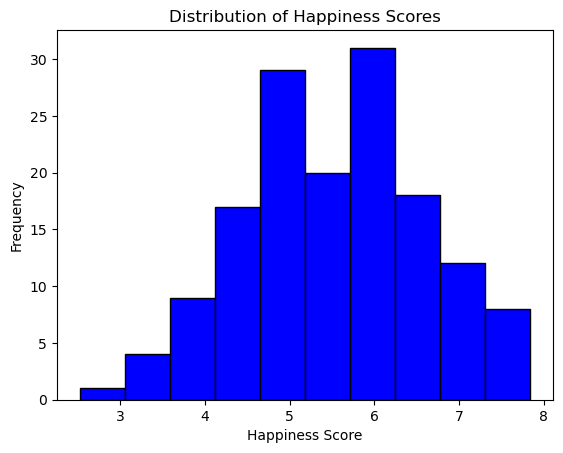

In [150]:
plt.hist(data['Ladder score'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Distribution of Happiness Scores')
plt.show()

### The mean score and median score in pandas are two ways to measure the central tendency of a data set.
but the mean score is more sensitive to outliers


In [23]:
mean_score = data['Ladder score'].mean()
median_score = data['Ladder score'].median()
print(f"Mean Happiness Score: {mean_score}")
print(f"Median Happiness Score: {median_score}")

Mean Happiness Score: 5.532838926174497
Median Happiness Score: 5.534


### Heat map gives the relation between all the columns in the dataset

C:\Users\Welcome\AppData\Local\Temp\ipykernel_9352\2976521558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


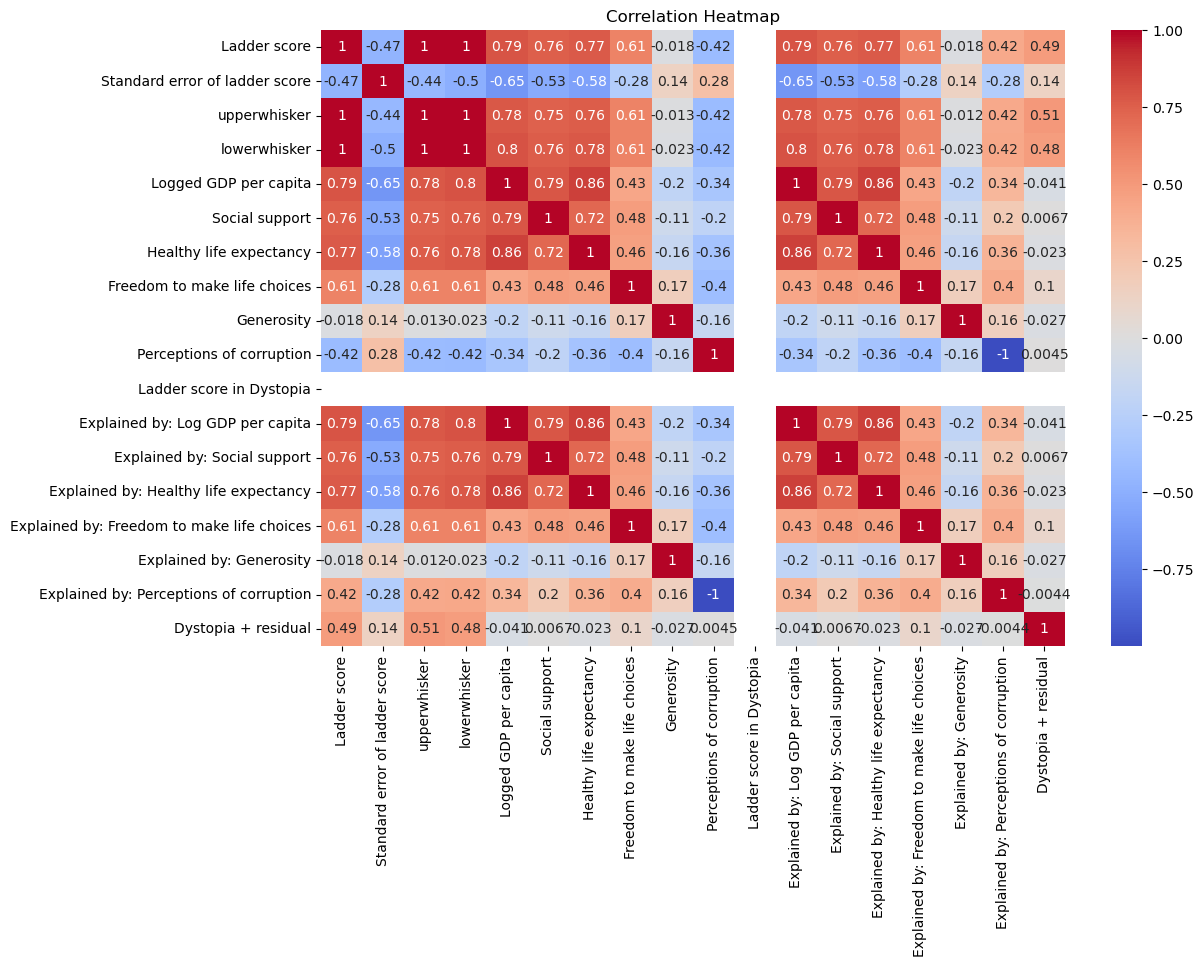

In [28]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights

# Task 2:

###  Different factors  effect on happiness score.

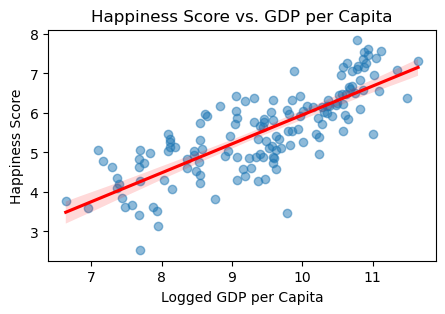

In [155]:
plt.figure(figsize=(5, 3))
sns.regplot(x='Logged GDP per capita', y='Ladder score', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the independent variables (features) and the target variable (Happiness Score)
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]
y = data['Ladder score']

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
model.score

Mean Squared Error (MSE): 0.39058618241055154
R-squared (R2): 0.6214584825034783


<bound method RegressorMixin.score of LinearRegression()>

## Insights


### Scatter plot to show to relation between ladder score and Income(GDP) regional wise

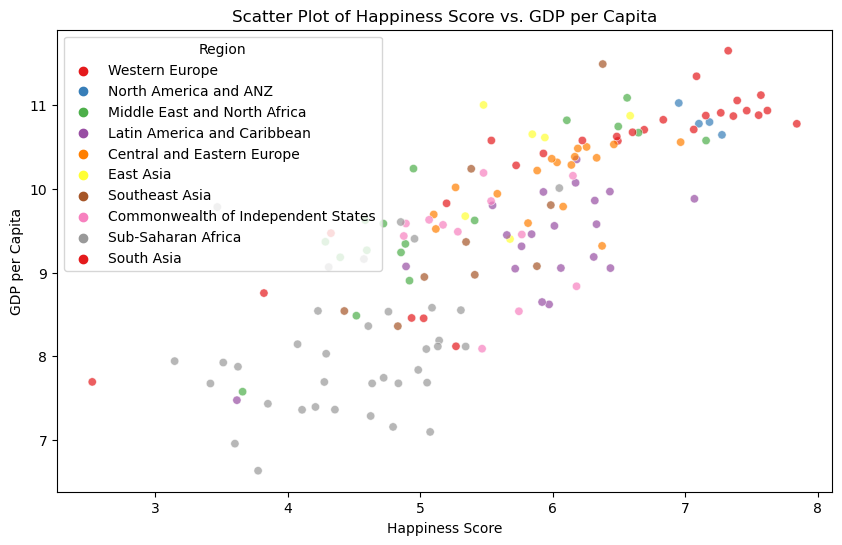

In [159]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ladder score', y='Logged GDP per capita', hue='Regional indicator', data=data, palette='Set1', alpha=0.7)

plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.legend(title='Region')
plt.title('Scatter Plot of Happiness Score vs. GDP per Capita')
plt.show()


## Insights


# Task 3: 

## some visualizations related to happiness score and other factors

#### National Income Per Capita and Happiness

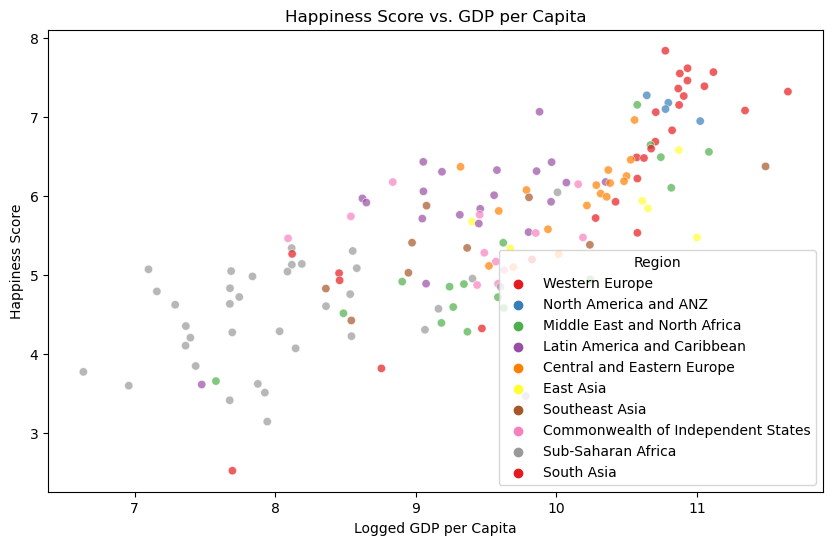

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', data=data, hue='Regional indicator', palette='Set1', alpha=0.7)
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Region')
plt.show()

#### pair plot of Happiness Score and others factors

<Figure size 1200x800 with 0 Axes>

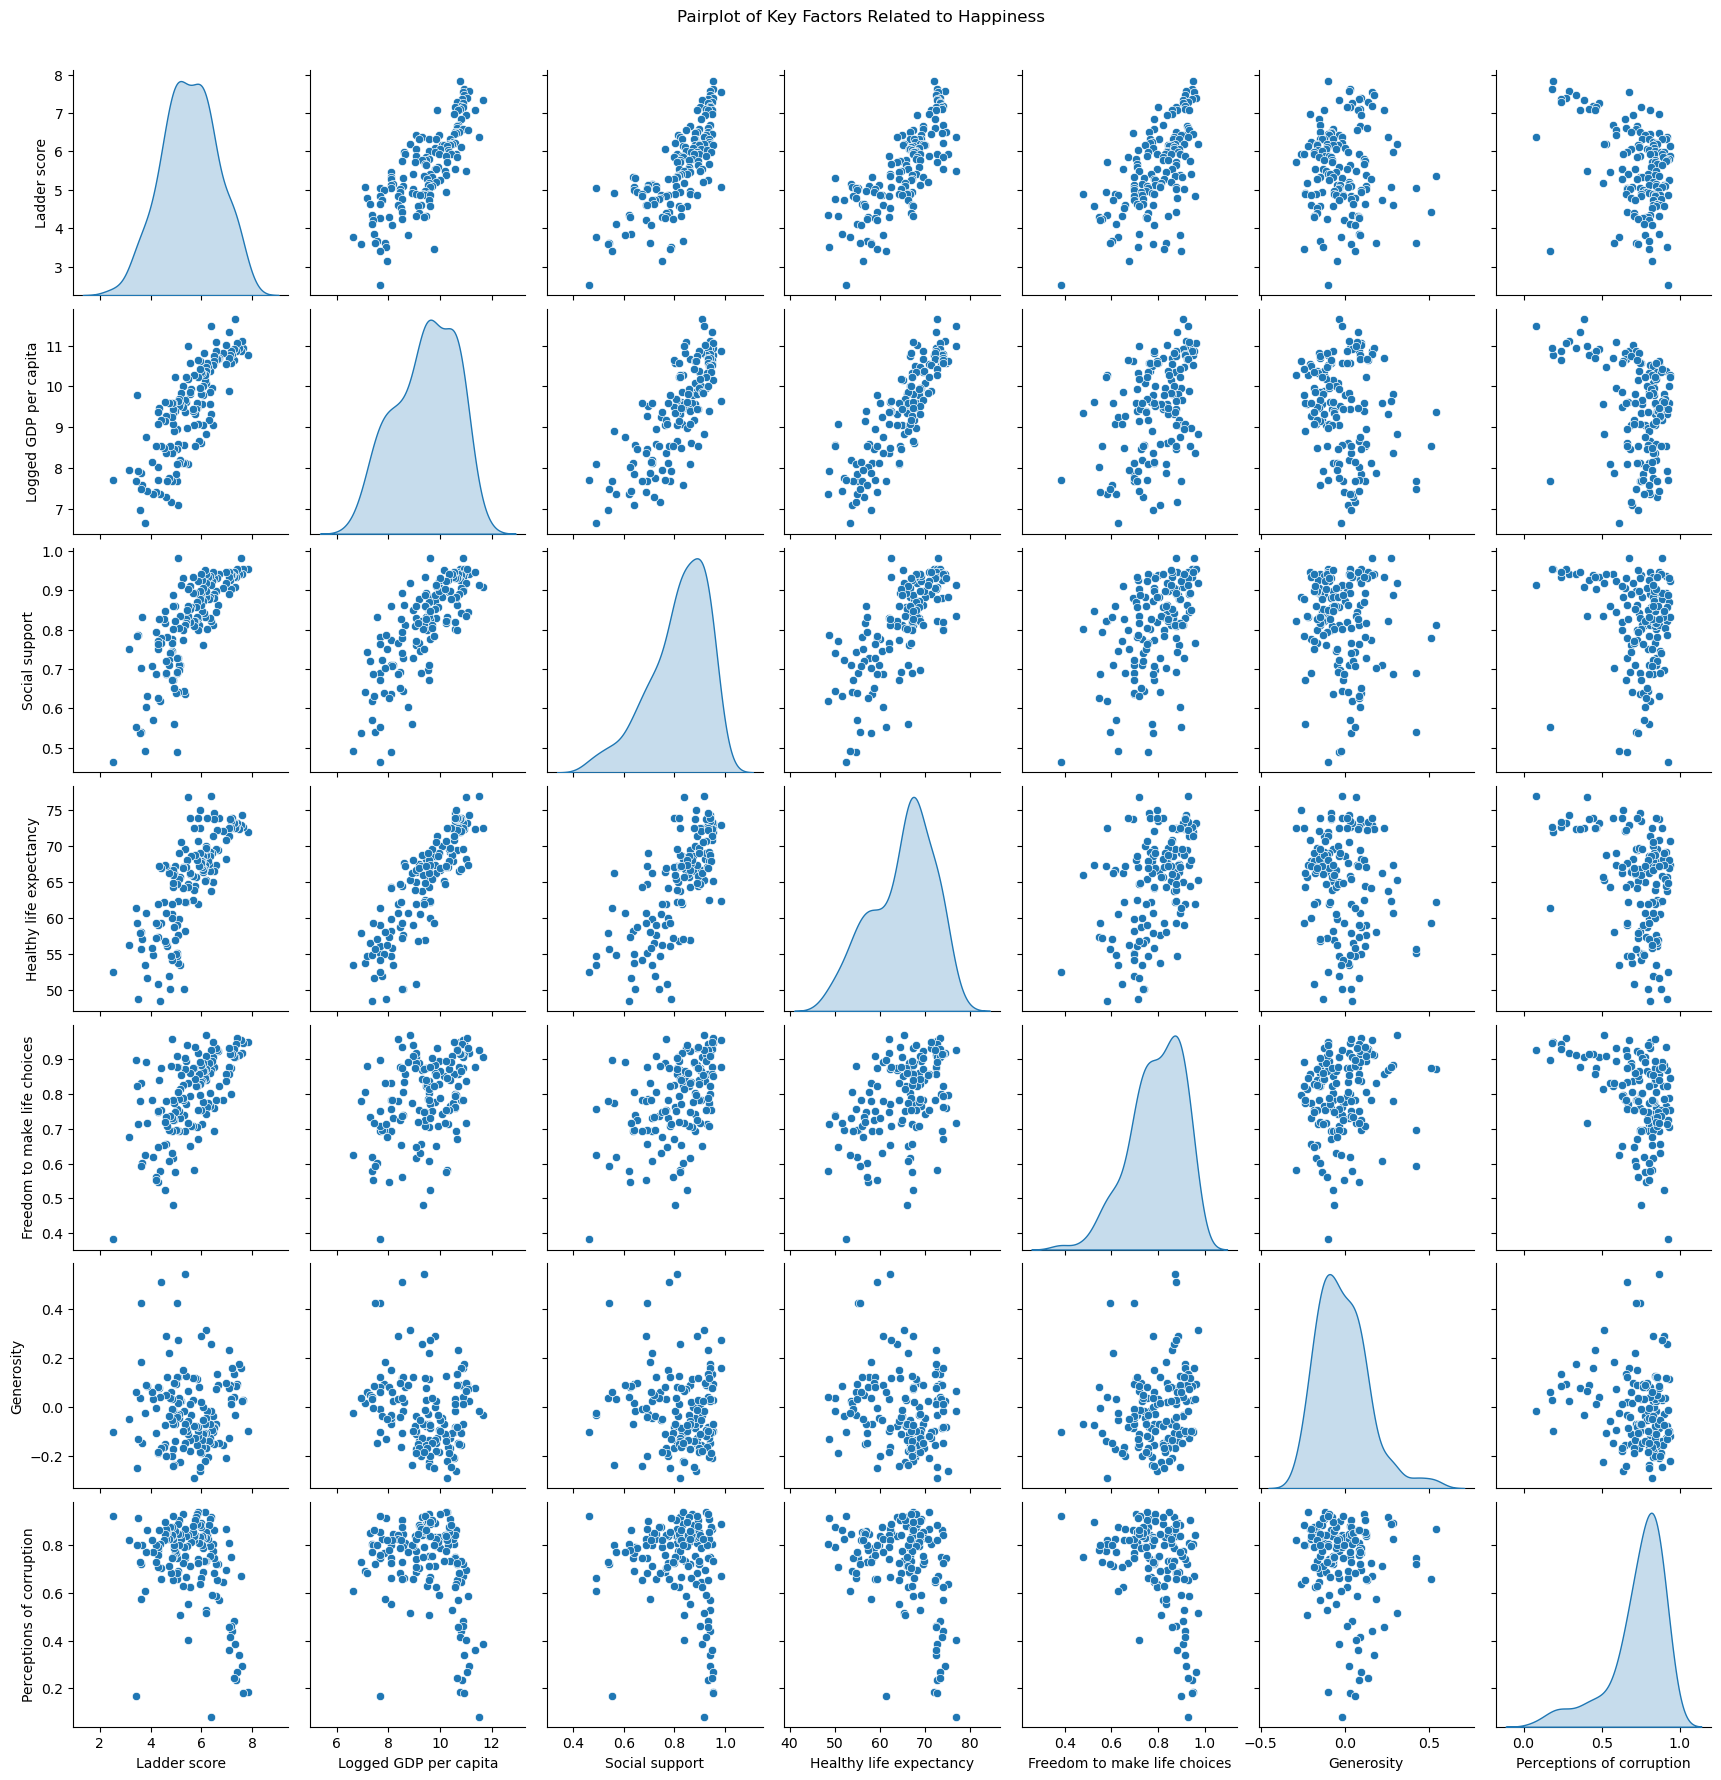

In [67]:
columns_of_interest = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(12, 8))
sns.pairplot(data[columns_of_interest], diag_kind='kde')
plt.suptitle('Pairplot of Key Factors Related to Happiness', y=1.02)
plt.show()


#### heatmap of Happiness Score and others factors

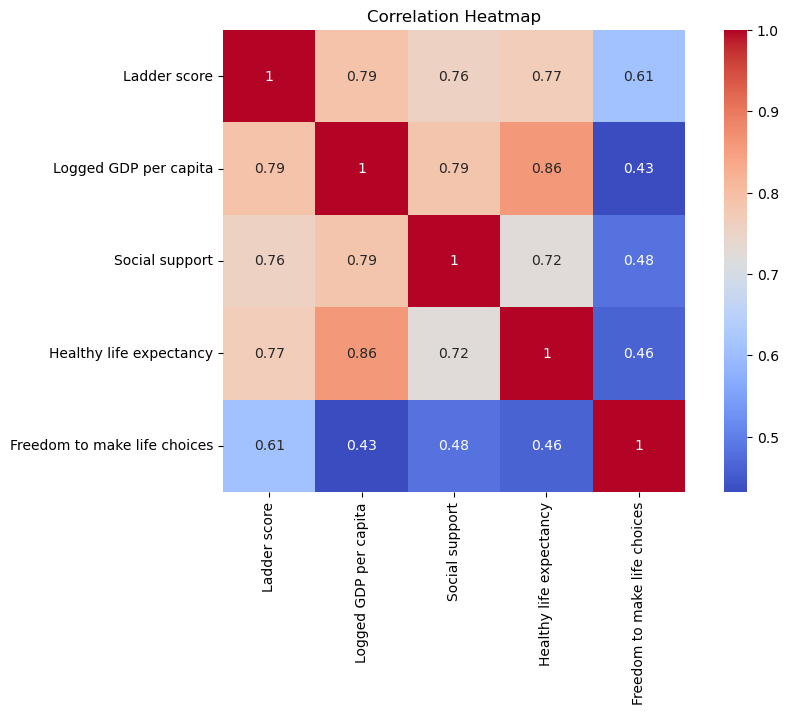

In [62]:
correlation_matrix = data[['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


### Boxplot of happiness score across the regions
#### Insights
##### It shows the range of happiness score for each region in the given dataset

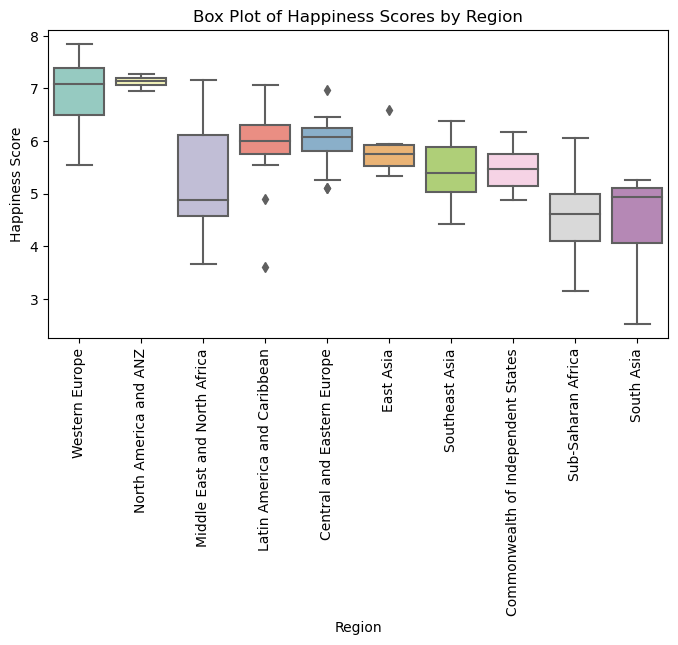

In [161]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Regional indicator', y='Ladder score', data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('Box Plot of Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()


# Task 4 

## Top ten and bottom ten countries analysis on basis happiness score

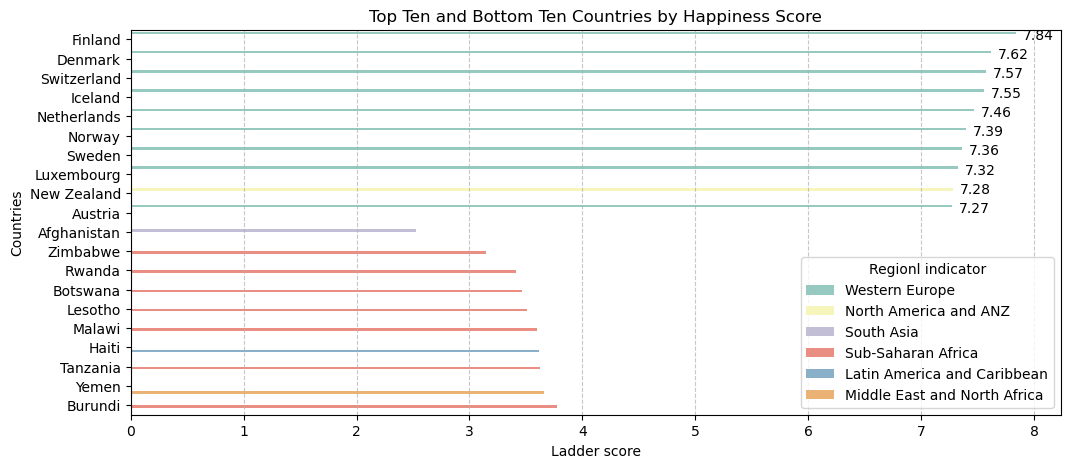

In [94]:
top_10_happiest = data.sort_values(by='Ladder score', ascending=False).head(10)
bottom_10_least_happy = data.sort_values(by='Ladder score').head(10)

# Combine the top and bottom dataframes for analysis
combined_df = pd.concat([top_10_happiest, bottom_10_least_happy])

# Create the plot using Seaborn
plt.figure(figsize=(12, 5))
ax = sns.barplot(x='Ladder score', y='Country name', hue='Regional indicator', data=combined_df, palette='Set3')
plt.xlabel('Ladder score')
plt.ylabel('Countries')
plt.title('Top Ten and Bottom Ten Countries by Happiness Score')
plt.legend(title='Regionl indicator')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add labels with the Happiness Score values
for index, row in combined_df.iterrows():
    ax.annotate(f"{row['Ladder score']:.2f}", (row['Ladder score'], index), xytext=(5, 0), textcoords='offset points')

#     plt.text(row['Ladder score'], row.name, f"{row['Ladder score']:.2f}", va='center')

plt.show()

# Task 5

## Happiest and Unhappiest Countries in 2021,2022,2023

In [166]:
# Filter data for a specific year (e.g., 2021)
year_2021 = data[data['Country name'] == 2021]
year_2022 = data[data['Country name'] == 2022]
year_2023 = data[data['Country name'] == 2023]

# Sort data by Ladder score in descending order to get the happiest countries
happiest_2021 = year_2021.sort_values(by='Ladder score', ascending=False)
happiest_2022 = year_2022.sort_values(by='Ladder score', ascending=False)
happiest_2023 = year_2023.sort_values(by='Ladder score', ascending=False)

# To get the unhappiest countries, simply change 'ascending=True'
unhappiest_2021 = year_2021.sort_values(by='Ladder score', ascending=True)
unhappiest_2022 = year_2022.sort_values(by='Ladder score', ascending=True)
unhappiest_2023 = year_2023.sort_values(by='Ladder score', ascending=True)

# Display the happiest and unhappiest countries for each specific year
print(f'Happiest Countries in 2021:')
print(happiest_2021[['Country name', 'Ladder score']].head(10))
print(f'Unhappiest Countries in 2021:')
print(unhappiest_2021[['Country name', 'Ladder score']].head(10))

print(f'Happiest Countries in 2022:')
print(happiest_2022[['Country name', 'Ladder score']].head(10))
print(f'Unhappiest Countries in 2022:')
print(unhappiest_2022[['Country name', 'Ladder score']].head(10))

print(f'Happiest Countries in 2023:')
print(happiest_2023[['Country name', 'Ladder score']].head(10))
print(f'Unhappiest Countries in 2023:')
print(unhappiest_2023[['Country name', 'Ladder score']].head(10))

Happiest Countries in 2021:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Unhappiest Countries in 2021:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Happiest Countries in 2022:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Unhappiest Countries in 2022:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Happiest Countries in 2023:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []
Unhappiest Countries in 2023:
Empty DataFrame
Columns: [Country name, Ladder score]
Index: []


# Task 6

## Relationship Between Happiness and Income

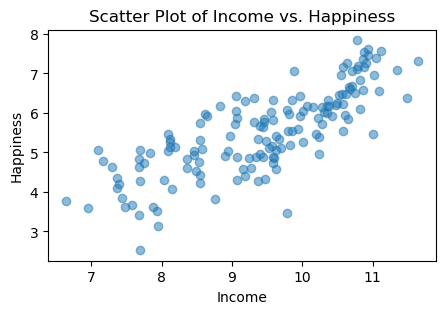

In [167]:
plt.figure(figsize=(5, 3))
plt.scatter(data["Logged GDP per capita"], data["Ladder score"], alpha=0.5)
plt.title('Scatter Plot of Income vs. Happiness')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()

In [162]:
# Corelation meaning
# If the value is close to 1, it indicates a strong positive correlation (as happiness increases, corruption perceptions decrease).
# If the value is close to -1, it indicates a strong negative correlation (as happiness increases, corruption perceptions increase).
# If the value is close to 0, it suggests a weak or no linear correlation.
correlation = data["Logged GDP per capita"].corr(data["Ladder score"])
print(f'Correlation between Income and Happiness: {correlation}')

Correlation between Income and Happiness: 0.7897596965098931


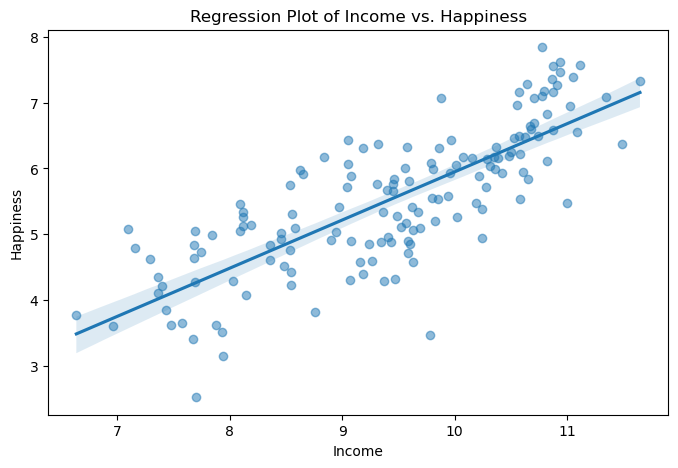

In [163]:
# regression plot to visualize the linear relationship between income and happiness. This plot includes a regression line.
plt.figure(figsize=(8, 5))
sns.regplot(x=data["Logged GDP per capita"], y=data["Ladder score"], scatter_kws={'alpha':0.5})
plt.title('Regression Plot of Income vs. Happiness')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.show()


# Task 7

## Relationship Between Happiness and Freedom

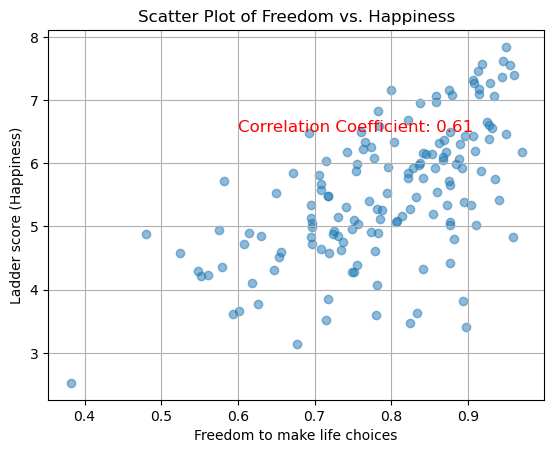

In [121]:
freedom_scores = data['Freedom to make life choices']
happiness_scores = data['Ladder score']

# Calculate the correlation coefficient using numpy
correlation_coefficient = np.corrcoef(freedom_scores, happiness_scores)[0, 1]

plt.scatter(freedom_scores, happiness_scores, alpha=0.5)
plt.title('Scatter Plot of Freedom vs. Happiness')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Ladder score (Happiness)')
plt.grid(True)

# Add the correlation coefficient to the plot
plt.text(0.6, 6.5, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='red')

# Show the plot
plt.show()


# Task 8

## Relationship Between Happiness and Corruption

In [129]:
happiness = data['Ladder score']
corruption = data['Perceptions of corruption']

# Calculate the correlation coefficient
correlation = happiness.corr(corruption)

print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: -0.4211399967385785


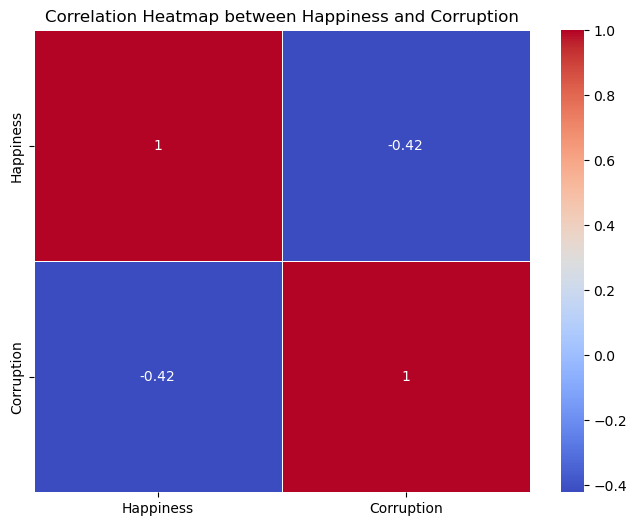

In [131]:
happiness = data['Ladder score']
corruption = data['Perceptions of corruption']

# Create a DataFrame with happiness and corruption columns
df = pd.DataFrame({'Happiness': happiness, 'Corruption': corruption})

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap between Happiness and Corruption")
plt.show()

# Task 9

## Ladder Score Distribution by Regional Indicator

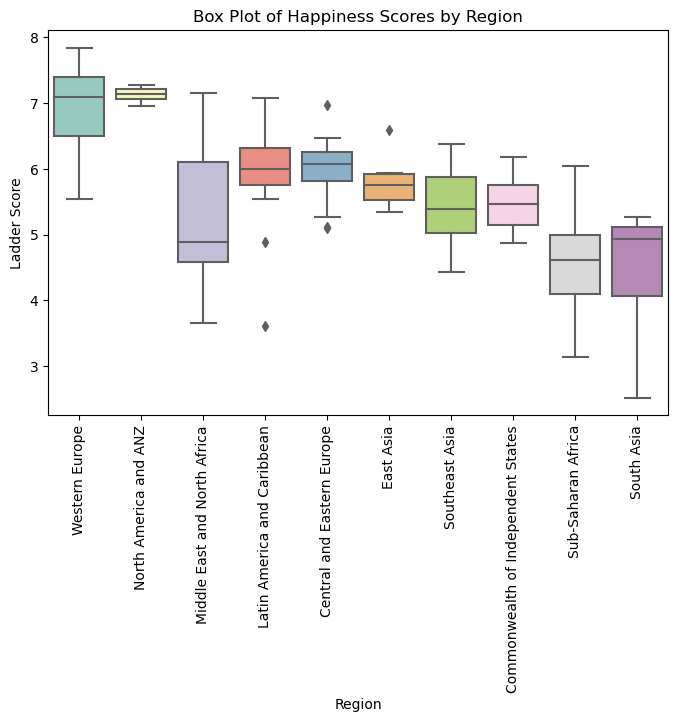

In [145]:
# It shows the distribution of Ladder score for each region
plt.figure(figsize=(8, 5))
sns.boxplot(x='Regional indicator', y='Ladder score', data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('Box Plot of Happiness Scores by Region')
plt.xlabel('Region')
plt.ylabel('Ladder Score')
plt.show()

# Task 10

## •	Ladder Score Distribution by Countries in map view

In [171]:
import plotly.express as px
fig = px.choropleth(
    data,
    locations='Country name',  # Name of the column with country names
    locationmode='country names',
    color='Ladder score',  # Name of the column with Ladder Scores
    hover_name='Country name',  # Show country names on hover
    color_continuous_scale='YlGnBu',  # Choose a color scale
    title='Ladder Score Distribution by Country'
)

# Show the map
fig.show()

# Task 11

## •	Most Generous and Most Ungenerous Countries in 2021

In [143]:
most_generous = data.sort_values(by='Generosity', ascending=False).head(5)
least_generous = data.sort_values(by='Generosity').head(5)

print("Most Generous Countries:")
print(most_generous[['Country name', 'Generosity']])

print("\nLeast Generous Countries:")
print(least_generous[['Country name', 'Generosity']])

Most Generous Countries:
    Country name  Generosity
81     Indonesia       0.542
125      Myanmar       0.509
97        Gambia       0.424
142        Haiti       0.422
41    Uzbekistan       0.311

Least Generous Countries:
    Country name  Generosity
67        Greece      -0.288
55         Japan      -0.258
145     Botswana      -0.246
57      Portugal      -0.244
107      Georgia      -0.238


# Task 12

## •	Relationship Between Features

#### We drew various graphs above, through which we can easily derive the relatoinships between the features and some are added below

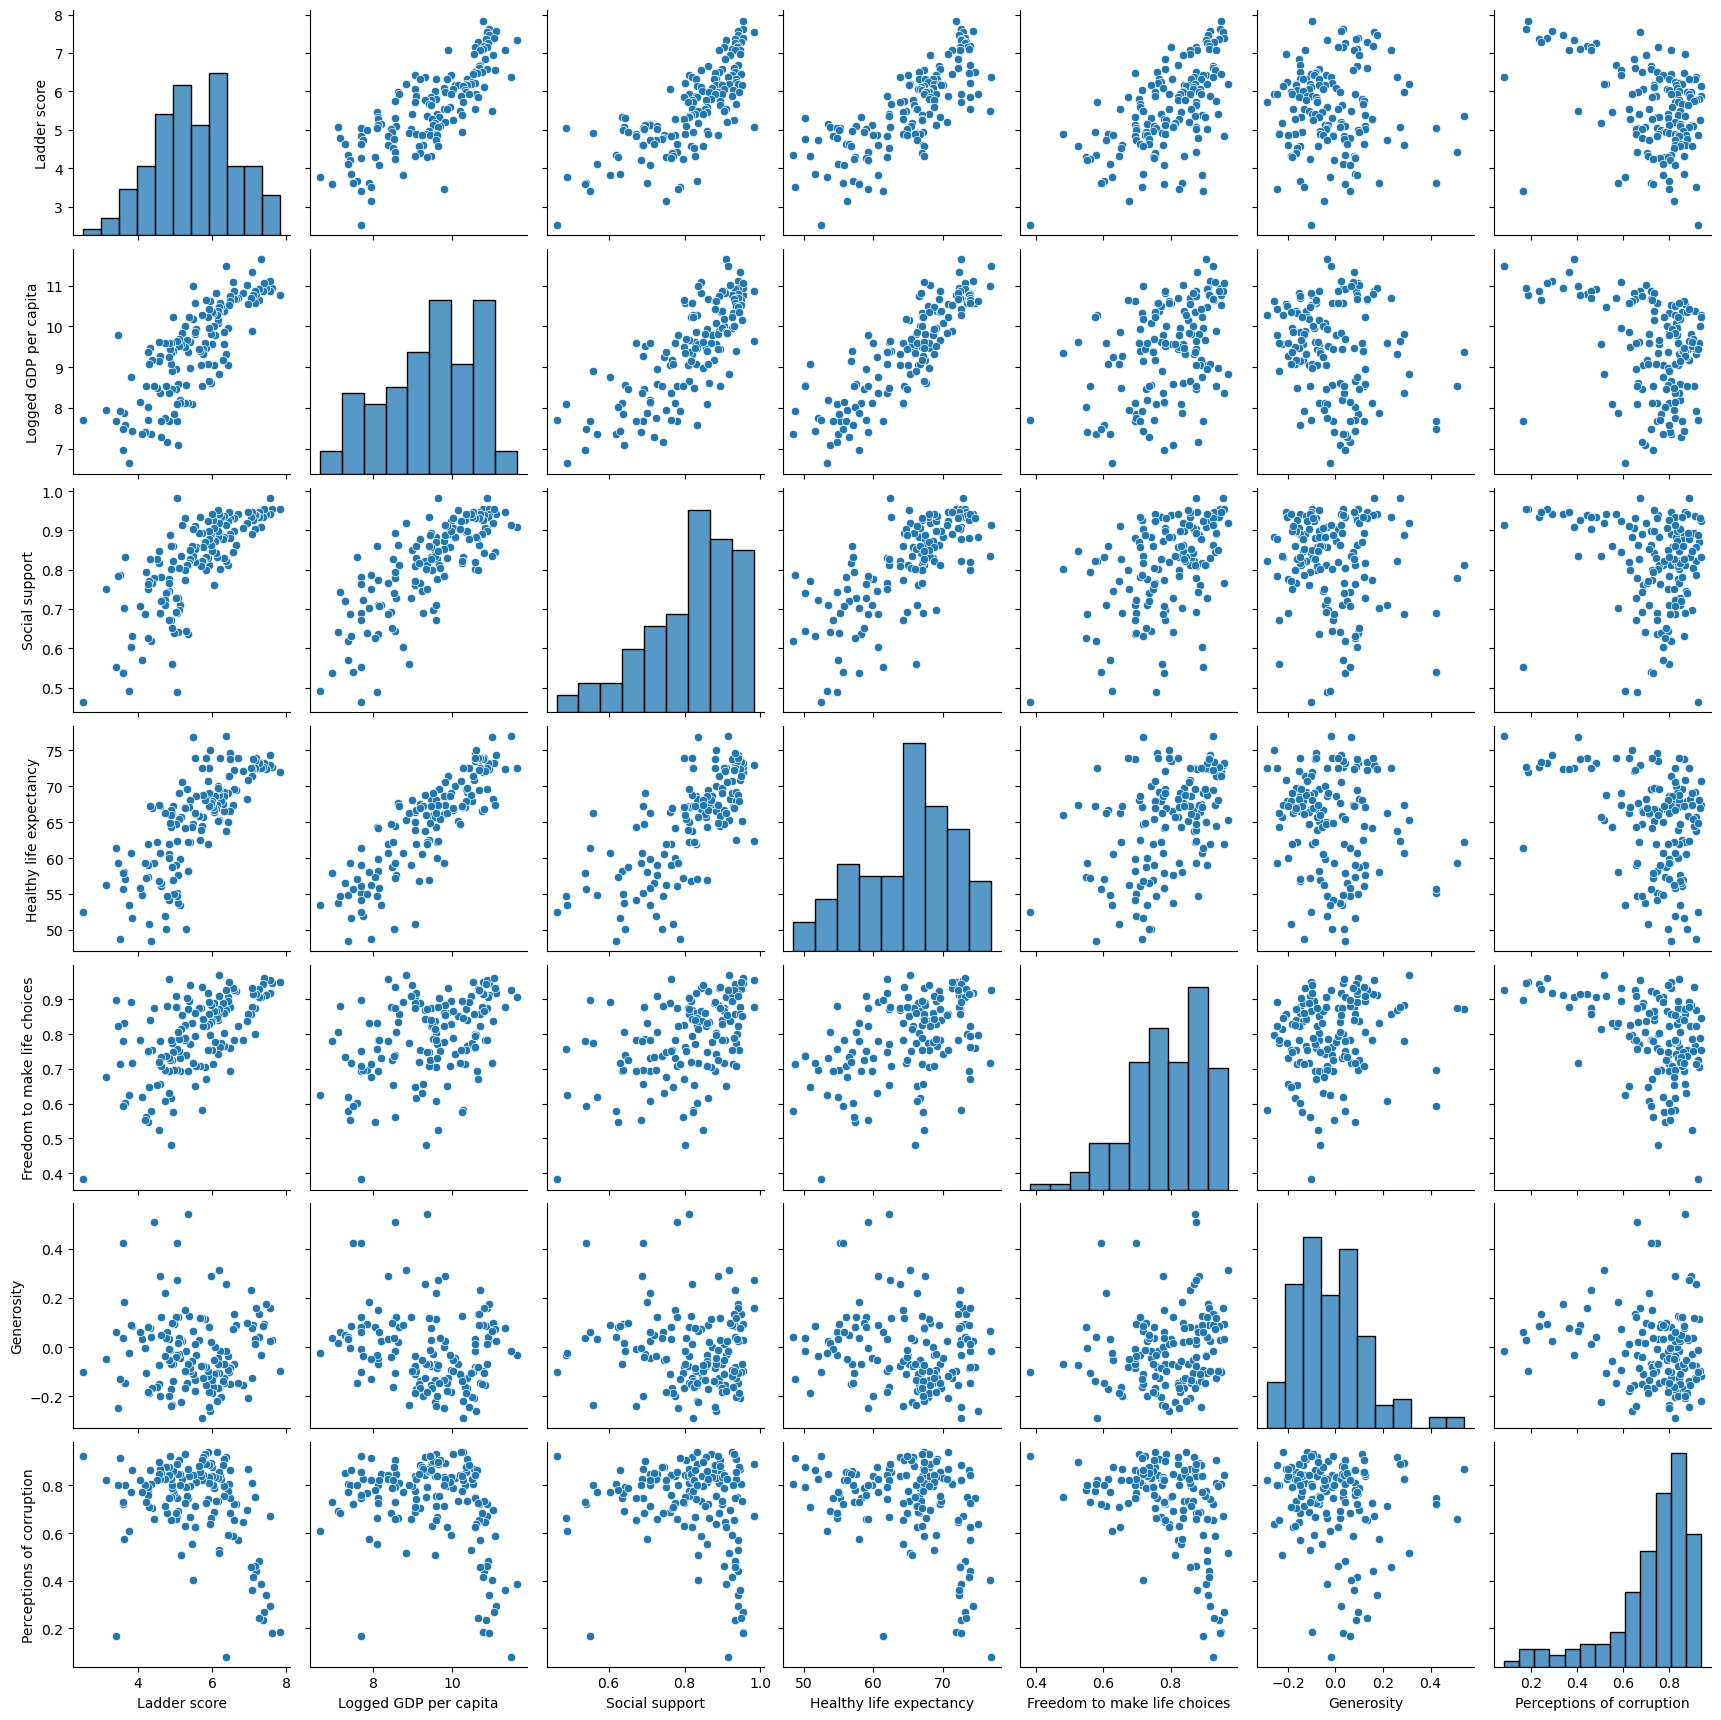

In [168]:
# Select a subset of columns for the pairplot
selected_features = ['Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a pairplot
sns.pairplot(data[selected_features])
plt.show()

### Relationship Between Income and Social support

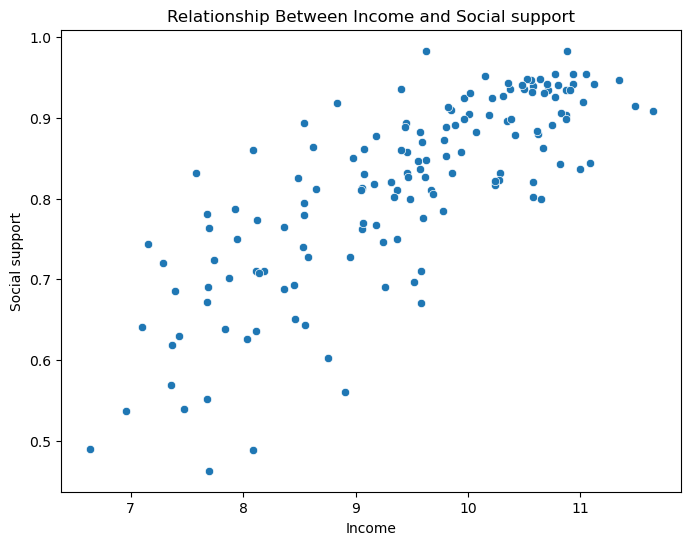

In [169]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logged GDP per capita', y='Social support', data=data)
plt.xlabel('Income')
plt.ylabel('Social support')
plt.title('Relationship Between Income and Social support')
plt.show()

### Relationship Between Ladder score and Freedom

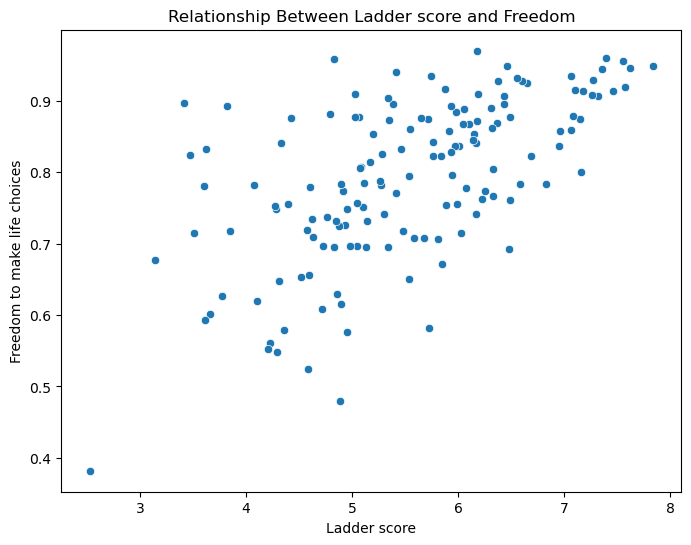

In [170]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ladder score', y='Freedom to make life choices', data=data)
plt.xlabel('Ladder score')
plt.ylabel('Freedom to make life choices')
plt.title('Relationship Between Ladder score and Freedom')
plt.show()

# Conclusion